#### 

# Parsing Hap.py outputs: Parsing Hap.py VC performance data

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import vcf
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import plotly.express as px
import statsmodels.api as sm

%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#### Pandas Viewing Settings

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Set matplotlib text export settings for Adobe Illustrator

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Parse info regarding samples of interest

In [5]:
Repo_DataDir = "../../Data"

PMP_SM_ResultsSummary_Dir_210108 = Repo_DataDir + "/210108_PMP_SM_50CI_V7_ResultsSummary"


PMP_50CI_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_50CI_AssemblySummary_V7.tsv"

PMP_42CI_CicularOnly_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_42CI_CircularOnly_F2Filtered_AssemblySummary_V7.tsv" 

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH = PMP_SM_ResultsSummary_Dir_210108 + "/210108_PMP_36CI_CircularOnly_F2Filtered_AtLeast40XMeanDepthIllumina_AssemblySummary_V7.tsv"       


PMP_50CI_AssemblySummary = pd.read_csv(PMP_50CI_AssemblySummary_TSV_PATH, sep = "\t")

PMP_42CI_CicularOnly_AssemblySummary = pd.read_csv(PMP_42CI_CicularOnly_AssemblySummary_TSV_PATH, sep = "\t")

PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary = pd.read_csv(PMP_36CI_CicularOnly_F2Filtered_AtLeast40XIllDepth_AssemblySummary_TSV_PATH, sep = "\t")

PMP_36CI_AnalysisSet_AssemblySummary = PMP_36CI_CicularOnly_F2Filtered_AtLeast40XDepth_AssemblySummary


SampleIDs_36CI_SOI = list( PMP_36CI_AnalysisSet_AssemblySummary["SampleID"].values )


print(','.join(SampleIDs_36CI_SOI) )

# Make sample to lineage mapping dict

ID_To_IlluminaAvrgCov_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'IlluminaWGSToH37rv_AvrgCov']].values)                     
ID_To_Lineage_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'PrimaryLineage_PB']].values)
ID_To_Dataset_Dict = dict(PMP_50CI_AssemblySummary[['SampleID', 'Dataset_Tag']].values)

M0011368_9,M0014888_3,M0016395_7,M0010874_7,01_R1430,02_R0894,02_R1708,02_R1896,M0016737_0,M0017522_5,01_R1134,M0003941_3,02_R1179,N1176,N0072,N0153,N0145,N0155,N0004,N1274,N0054,N1272,N0091,N1202,N1177,RW-TB008,DNA028,DNA075,DNA091,DNA044,DNA020,AZE_02_042,DNA019_Rose,DNA120,DNA188,DNA086


## Construct dictionary with PATHs to relevant files for all samples

### Define directories to PMP-SM (PacBio assembly and analysis pipeline)

In [6]:
### Define directories to PMP-SM (PacBio assembly and analysis pipeline)

### Define varaint calling pipeline output directories

PacBio_ProjectDir = "/n/data1/hms/dbmi/farhat/mm774/Projects/PacBio_Evaluation_Project"

PMP_SM_Outputs_Dir = PacBio_ProjectDir + "/PacmanPipe_SM_Outputs"

PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir = PMP_SM_Outputs_Dir + "/201201_PMP_SM_TB_Portals_R1_Output_V2"



In [7]:
!ls -1 $PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir/M0011368_9/Hap.py_VariantCalling_EvalDir/

Happy_StratificationFiles
PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved
PBMM2_PBonly_NoPilonPolishing_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved


In [8]:
!ls -lah $PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir/M0011368_9/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved         

total 416K
drwxrwsr-x 13 mm774 farhat 1.3K Mar 22 22:06 .
drwxrwsr-x  5 mm774 farhat  289 Jan 21 14:48 ..
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  648 Mar 22 22:06 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K100E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  586 Mar 19 16:28 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K50E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  586 Mar 25 11:12 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat 1.1K Mar 25 11:09 M0011368_9_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  586 Mar 25 11:11 M0011368_9_Happy_VCeval_

## Save the PATHs of HapPy analysis from the following masking schemes:


In [9]:
SampleID_ToPaths_Dict = {}

for SampleID in SampleIDs_36CI_SOI:

    SampleID_ToPaths_Dict[SampleID] = {}    
    
    # Defining PATHs for PacBio data output (PacmanPipe-V4)
    sample_PMP_OutputDir = PMP_SM_TB_Portals_R1_Illumina_WGS_201201_OutputDir + "/" + SampleID
    Happy_OutDir = f"{sample_PMP_OutputDir}/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved"
    
    
    # No Masking ("None")
    RegionFilteringScheme = "MM2vsPilon_NoneRemoved"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}
    
    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved"

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"
    
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CSV



    # Coscolla et al Masking Scheme ("Coscolla_Regions_Removed")
    RegionFilteringScheme = "MM2vsPilon_CoscollaRegionsRemoved"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}

    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved"                                                    

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                   

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV               


    # Coscolla et al Masking Scheme ("MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed")
    RegionFilteringScheme = "MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}

    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_PE_PGRS_And_PPE_MPTR_Removed"                                                    

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                   

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_CoscollaMasking_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_CoscollaMasking_CSV               

    
    
    
    # Pileup Mappability Masking - K50E4 ("Pmap_K50E4_Below_0.95_Removed")
    RegionFilteringScheme = "MM2vsPilon_Pmap_K50E4_Below_1_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_Pmap_K50E4_Below1Removed"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K50E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K50E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K50E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K50E4_Below095_CSV               


    # Pileup Mappability Masking - K100E4 ("Pmap_K100E4_Below_0.95_Removed")
    RegionFilteringScheme = "MM2vsPilon_Pmap_K100E4_Below_1_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_Pmap_K100E4_Below1Removed"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV               
 
    
    
    
    #  Masking based on Refined Low Confidence (RLC) regions
    RegionFilteringScheme = "MM2vsPilon_RLC_Regions_Removed"
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"] = {}
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"] = {}


    Happy_Sample_Dir = f"{Happy_OutDir}/{SampleID}_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_RefinedLowConfidenceRegionsRemoved"                          

    Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.SNP.PASS.csv.gz"
    Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV = f"{Happy_Sample_Dir}/Hap.py.{SampleID}.roc.Locations.INDEL.PASS.csv.gz"                                

    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["SNPs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_SNPs_PASS_Pmap_K100E4_Below095_CSV
    SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme]["INDELs"]["Happy_ROC_PASS_CSV"] = Happy_G3PP_Vs_Pilon_ROC_INDELs_PASS_Pmap_K100E4_Below095_CSV               
 
    
       
    
    
    
    
    

## Parsing Hap.py Output from all 40 Mtb isolates

## Define function for parsing VariantCalling Performance

In [10]:
def parse_HapPy_Benchmark_CSV(input_HapPy_ROC_CSV_PATH):
    """ 
    """
    
    Sample_ROC_DF = pd.read_csv(input_HapPy_ROC_CSV_PATH) 
    #Sample_ROC_DF = Sample_ROC_DF.drop(Sample_ROC_DF.index[0])
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()
    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)
    
    return Sample_ROC_DF
   

In [11]:
def parse_HapPy_Benchmark_CSV_NOFFILL(input_HapPy_ROC_CSV_PATH):
    """ 
    """
    
    Sample_ROC_DF = pd.read_csv(input_HapPy_ROC_CSV_PATH) 
    #Sample_ROC_DF = Sample_ROC_DF.drop(Sample_ROC_DF.index[0])
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    #Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index
    
    return Sample_ROC_DF
   

### UPDATED FFILL PARSER
#### This version adds a QQ==60 row to the dataframe if it doesn't exist

In [12]:
def parse_HapPy_Benchmark_DF_and_FFILL(Sample_ROC_DF):
    """ 
    """
    
    Sample_ROC_DF = Sample_ROC_DF[ Sample_ROC_DF["QQ"] != "*"]
    Sample_ROC_DF["QQ"] = Sample_ROC_DF["QQ"].astype(float)
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    
    
    if Sample_ROC_DF.shape[0] <= 1:
        print(Sample_ROC_DF.shape[0] )
        Sample_ROC_DF["QQ"] = -10
        return Sample_ROC_DF

    
    #print(Sample_ROC_DF[-1:].values.shape)
    
    Sample_ROC_DF_lastRow_ToMQ60 = pd.DataFrame(Sample_ROC_DF[-1:].values,  columns=Sample_ROC_DF.columns)
    
    MQ_Thresh_OfLastRow = Sample_ROC_DF_lastRow_ToMQ60["QQ"].values[0]
    
    if MQ_Thresh_OfLastRow != 60:
        print(MQ_Thresh_OfLastRow)
        Sample_ROC_DF_lastRow_ToMQ60["QQ"] = 60

        Sample_ROC_DF = Sample_ROC_DF.append(Sample_ROC_DF_lastRow_ToMQ60)
    
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']
    
    
    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  
    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()
    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)
    
    return Sample_ROC_DF


In [13]:
def parse_HapPy_Benchmark_DF_and_FFILL_And_Add0_UpTo60QQ(Sample_ROC_DF):
    """ 
    """
    
    Sample_ROC_DF_OG = Sample_ROC_DF.copy()
    
    Sample_ROC_DF = Sample_ROC_DF[ Sample_ROC_DF["QQ"] != "*"]
    Sample_ROC_DF["QQ"] = Sample_ROC_DF["QQ"].astype(float)
    Sample_ROC_DF = Sample_ROC_DF.sort_values("QQ")
    Sample_ROC_DF.index = Sample_ROC_DF['QQ']

    if Sample_ROC_DF.shape[0] <= 1:
        print(Sample_ROC_DF.shape[0] )
        Sample_ROC_DF["QQ"] = -10
        return Sample_ROC_DF

    


    Sample_ROC_DF_lastRow_ToMQ60 = pd.DataFrame(Sample_ROC_DF.iloc[[-1]].values,  columns=Sample_ROC_DF.columns)
    MQ_Thresh_OfLastRow = Sample_ROC_DF_lastRow_ToMQ60["QQ"].values[0]

    if MQ_Thresh_OfLastRow != 60:
        print("Max QQ in table", Sample_ROC_DF.QQ.max() )
        Sample_ROC_DF_lastRow_ToMQ60["QQ"] = 60
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.Recall"] = 0 # np.nan #0 # Set Recall to ZERO b/c there are still FN, but not a single one was called
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.Precision"] = np.nan #0  # Set Precision to NAN b/c there were no Positive calls made at all
        Sample_ROC_DF_lastRow_ToMQ60["METRIC.F1_Score"] = 0 # np.nan #0   # Set F1 score to ZERO b/c Recall is ZERO
    

        #Sample_ROC_DF_lastRow_ToMQ60["QUERY.TPs"] = 0
        #Sample_ROC_DF_lastRow_ToMQ60["QUERY.TOTAL] + Sample_ROC_DF_lastRow_ToMQ60["TRUTH.TP"]


        Sample_ROC_DF_lastRow_ToMQ60.index = [60]

        Sample_ROC_DF = Sample_ROC_DF.append(Sample_ROC_DF_lastRow_ToMQ60)


    Sample_ROC_DF = Sample_ROC_DF.reindex(np.arange(Sample_ROC_DF.QQ.min(), Sample_ROC_DF.QQ.max() + 1), fill_value=np.nan)  

    Sample_ROC_DF["QQ"] = Sample_ROC_DF.index

    Sample_ROC_DF = Sample_ROC_DF.ffill()

    Sample_ROC_DF = Sample_ROC_DF.reset_index(drop=True)

    return Sample_ROC_DF


In [14]:
SampleID_ToPaths_Dict["N0153"].keys()

dict_keys(['MM2vsPilon_NoneRemoved', 'MM2vsPilon_CoscollaRegionsRemoved', 'MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed', 'MM2vsPilon_Pmap_K50E4_Below_1_Removed', 'MM2vsPilon_Pmap_K100E4_Below_1_Removed', 'MM2vsPilon_RLC_Regions_Removed'])

In [15]:

listOf_FilteringSchemes = ["MM2vsPilon_CoscollaRegionsRemoved", # "MM2vsPilon_Pmap_K100E4_Below_1_Removed", #"MM2vsPilon_PE_PGRS_And_PPE_MPTR_Removed",
                           "MM2vsPilon_Pmap_K50E4_Below_1_Removed",
                           "MM2vsPilon_NoneRemoved",
                           "MM2vsPilon_RLC_Regions_Removed"]


listOf_VariantTypes = ["SNPs", "INDELs"]


listOf_HapPy_DFs = []

for RegionFilteringScheme in tqdm(listOf_FilteringSchemes):
    for SampleID in (SampleIDs_36CI_SOI):
        for variantType in listOf_VariantTypes:
            #print(RegionFilteringScheme, SampleID, variantType)

            i_HapPy_ROC_PASS_CSV_PATH = SampleID_ToPaths_Dict[SampleID][RegionFilteringScheme][variantType]["Happy_ROC_PASS_CSV"] 

            i_HapPy_PASS_DF = pd.read_csv(i_HapPy_ROC_PASS_CSV_PATH)
            
            i_HapPy_PASS_DF = parse_HapPy_Benchmark_DF_and_FFILL_And_Add0_UpTo60QQ(i_HapPy_PASS_DF)

            columnsToKeep_HappyTable = ['Type', 'Subtype', 'Subset', 'Filter', 'Genotype', 'QQ.Field',
                                         'QQ', 'METRIC.Recall', 'METRIC.Precision', 'METRIC.Frac_NA',
                                         'METRIC.F1_Score', 'TRUTH.TP', 'TRUTH.FN', 'QUERY.TP',
                                         'QUERY.FP', 'QUERY.UNK']


            i_VC_PR_Curve_DF = i_HapPy_PASS_DF[columnsToKeep_HappyTable]

            i_VC_PR_Curve_DF.loc[:,'SampleID'] = SampleID
            i_VC_PR_Curve_DF.loc[:,'RegionFilteringScheme'] = RegionFilteringScheme
            i_VC_PR_Curve_DF.loc[:,'variantType'] = variantType

            listOf_HapPy_DFs.append(i_VC_PR_Curve_DF)
            
HapPy_PR_DF_IndividualCurves = pd.concat(listOf_HapPy_DFs)

HapPy_PR_DF_IndividualCurves["QQ"] = HapPy_PR_DF_IndividualCurves["QQ"].astype(int) #Experimental

  0%|          | 0/4 [00:00<?, ?it/s]/home/mm774/conda3/envs/py37_S/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mm774/conda3/envs/py37_S/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 4/4 [00:08<00:00,  2.24s/it]


In [16]:
!ls -lah /n/data1/hms/dbmi/farhat/mm774/Projects/PacBio_Evaluation_Project/PacmanPipe_SM_Outputs/201201_PMP_SM_TB_Portals_R1_Output_V2/N0091/Hap.py_VariantCalling_EvalDir/PBMM2_Paftools_GroundTruthVCF_Evaluations_V3_minMQ_1_minDP_5_Fix_All_Breaks_AmbRegionsRemoved/

total 416K
drwxrwsr-x 13 mm774 farhat 1.3K Mar 19 16:28 .
drwxrwsr-x  5 mm774 farhat  289 Jan 21 14:29 ..
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:21 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K100E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  531 Mar 19 16:29 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_mpileup_call_VCs_Pmap_K50E4_Below1Removed
drwxrwsr-x  2 mm774 farhat  531 Mar 25 10:54 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_CoscollaRegionsRemoved
drwxrwsr-x  2 mm774 farhat  939 Mar 25 10:53 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pilon_VCs_NoRegionsRemoved
drwxrwsr-x  2 mm774 farhat  531 Mar 25 10:53 N0091_Happy_VCeval_T_PB_G3PP_MM2_paftools_Vs_Q_Ill_Pil

In [17]:
#i_VC_PR_Curve_DF

In [18]:
HapPy_PR_DF_IndividualCurves.head()

,Type,Subtype,Subset,Filter,Genotype,QQ.Field,QQ,METRIC.Recall,METRIC.Precision,METRIC.Frac_NA,METRIC.F1_Score,TRUTH.TP,TRUTH.FN,QUERY.TP,QUERY.FP,QUERY.UNK,SampleID,RegionFilteringScheme,variantType
0,SNP,*,*,PASS,*,INFO.MQ,0,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
1,SNP,*,*,PASS,*,INFO.MQ,1,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
2,SNP,*,*,PASS,*,INFO.MQ,2,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
3,SNP,*,*,PASS,*,INFO.MQ,3,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
4,SNP,*,*,PASS,*,INFO.MQ,4,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs


In [19]:
HapPy_PR_DF_IndividualCurves.shape

(17568, 19)

In [20]:
HapPy_PR_DF_IndividualCurves.head(3)

,Type,Subtype,Subset,Filter,Genotype,QQ.Field,QQ,METRIC.Recall,METRIC.Precision,METRIC.Frac_NA,METRIC.F1_Score,TRUTH.TP,TRUTH.FN,QUERY.TP,QUERY.FP,QUERY.UNK,SampleID,RegionFilteringScheme,variantType
0,SNP,*,*,PASS,*,INFO.MQ,0,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
1,SNP,*,*,PASS,*,INFO.MQ,1,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs
2,SNP,*,*,PASS,*,INFO.MQ,2,0.691239,0.998457,0.0,0.816919,647.0,289.0,647.0,1.0,0.0,M0011368_9,MM2vsPilon_CoscollaRegionsRemoved,SNPs


In [21]:
HapPy_PR_DF_IndividualCurves["RegionFilteringScheme"].value_counts()

MM2vsPilon_NoneRemoved                   4392
MM2vsPilon_Pmap_K50E4_Below_1_Removed    4392
MM2vsPilon_RLC_Regions_Removed           4392
MM2vsPilon_CoscollaRegionsRemoved        4392
Name: RegionFilteringScheme, dtype: int64

# Average (and calculate Standard Error of the mean) Precision and Recall across all 28 CI

In [22]:
# https://stackoverflow.com/questions/19202093/how-to-select-columns-from-groupby-object-in-pandas
HapPy_Mean_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).mean().reset_index()
HapPy_STD_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).std().reset_index()
HapPy_SEM_PR_DF = HapPy_PR_DF_IndividualCurves.groupby(["QQ", "RegionFilteringScheme", "variantType"]).sem().reset_index()


ColumnsToMergeOn = ["QQ", "RegionFilteringScheme", "variantType"]

HapPy_PR_DF = HapPy_Mean_PR_DF.merge(HapPy_SEM_PR_DF,
                                                     left_on = ColumnsToMergeOn,
                                                     right_on = ColumnsToMergeOn,
                                                     suffixes=('_MEAN', '_SEM') ).reset_index(drop=True)

In [23]:

# Divide PR-Curve results into INDELs and SNPs
HapPy_PR_DF_SNPs = HapPy_PR_DF[ HapPy_PR_DF["variantType"] == "SNPs"]
HapPy_PR_DF_SNPs_QQ_0to55 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [0]  +   list(np.arange(5, 60, 5)) )]   
HapPy_PR_DF_SNPs_QQ_0to60 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [0]  +   list(np.arange(5, 65, 5)) )]   


HapPy_PR_DF_INDELs = HapPy_PR_DF[HapPy_PR_DF["variantType"] == "INDELs"]
HapPy_PR_DF_INDELs_QQ_0to55 = HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["QQ"].isin(  [0]  +   list(np.arange(5, 60, 5)) )]   
HapPy_PR_DF_INDELs_QQ_0to60 = HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["QQ"].isin(  [0]  +   list(np.arange(5, 65, 5)) )]   

In [24]:
HapPy_PR_DF_SNPs_QQ_30 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [30] )]   

In [25]:
HapPy_PR_DF.shape

(488, 21)

In [26]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 30 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
240,30,MM2vsPilon_CoscollaRegionsRemoved,INDELs,0.616656,0.975255,0.001738,0.753770,85.055556,51.027778,85.055556,2.055556,0.194444,0.010586,0.002851,0.000600,0.008309,5.766480,2.860371,5.752838,0.284366,0.066898
241,30,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.703359,0.993631,0.001661,0.823002,1066.805556,425.111111,1066.833333,6.305556,2.055556,0.006871,0.000756,0.000479,0.004729,76.295383,19.616270,76.348403,0.629713,0.571748
242,30,MM2vsPilon_NoneRemoved,INDELs,0.819620,0.974803,0.004523,0.888867,111.805556,24.277778,113.888889,2.916667,0.555556,0.011322,0.002695,0.001117,0.007099,7.066220,2.077701,7.070033,0.336591,0.140546
243,30,MM2vsPilon_NoneRemoved,SNPs,0.881437,0.988175,0.007697,0.931280,1323.222222,168.694444,1318.111111,15.166667,11.611111,0.006200,0.001275,0.001381,0.003328,87.946088,10.888746,87.929533,1.522060,2.203993
244,30,MM2vsPilon_Pmap_K50E4_Below_1_Removed,INDELs,0.724018,0.976643,0.004503,0.830137,99.277778,36.805556,99.250000,2.388889,0.472222,0.010425,0.002280,0.001284,0.007299,6.451358,2.399014,6.462882,0.259051,0.140781
245,30,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779611,0.997821,0.003967,0.874849,1174.916667,317.000000,1174.916667,2.388889,5.250000,0.006114,0.000364,0.000760,0.003879,80.388169,16.020869,80.405484,0.400947,1.037683
246,30,MM2vsPilon_RLC_Regions_Removed,INDELs,0.695014,0.983682,0.000188,0.812467,95.833333,40.250000,95.694444,1.500000,0.027778,0.011941,0.001094,0.000188,0.008639,6.527901,2.361522,6.507971,0.135107,0.027778
247,30,MM2vsPilon_RLC_Regions_Removed,SNPs,0.799307,0.999424,0.001730,0.887645,1208.722222,283.194444,1208.777778,0.666667,2.388889,0.007000,0.000189,0.000385,0.004348,84.551239,12.463586,84.530600,0.178174,0.580473


In [27]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 45 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
360,45,MM2vsPilon_CoscollaRegionsRemoved,INDELs,0.615280,0.991593,0.001767,0.757712,84.805556,51.277778,84.777778,0.500000,0.194444,0.010448,0.002291,0.000610,0.008375,5.722390,2.899538,5.717852,0.129099,0.066898
361,45,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.700487,0.998050,0.001349,0.822542,1062.194444,429.722222,1062.277778,1.750000,1.666667,0.006871,0.000380,0.000364,0.004776,75.812769,20.122033,75.779668,0.265399,0.430946
362,45,MM2vsPilon_NoneRemoved,INDELs,0.805407,0.990683,0.004261,0.887053,109.833333,26.250000,111.694444,1.000000,0.500000,0.011079,0.001767,0.001157,0.007264,6.943708,2.146379,6.933679,0.178174,0.140859
363,45,MM2vsPilon_NoneRemoved,SNPs,0.845784,0.993231,0.006229,0.913096,1271.222222,220.694444,1266.472222,8.166667,9.000000,0.006482,0.000972,0.000913,0.003796,85.381600,12.704694,85.444816,1.120870,1.512383
364,45,MM2vsPilon_Pmap_K50E4_Below_1_Removed,INDELs,0.720483,0.985399,0.004547,0.831051,98.861111,37.222222,98.861111,1.361111,0.472222,0.010345,0.002205,0.001294,0.007429,6.447610,2.384843,6.429613,0.211393,0.140781
365,45,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.777031,0.998148,0.003642,0.873330,1171.500000,320.416667,1171.861111,2.000000,4.805556,0.006204,0.000332,0.000663,0.003951,80.427553,15.977036,80.420661,0.371612,0.912714
366,45,MM2vsPilon_RLC_Regions_Removed,INDELs,0.693597,0.984257,0.000188,0.811728,95.583333,40.500000,95.472222,1.416667,0.027778,0.011800,0.001138,0.000188,0.008561,6.488742,2.392946,6.498044,0.128329,0.027778
367,45,MM2vsPilon_RLC_Regions_Removed,SNPs,0.784781,0.999435,0.001636,0.878587,1186.888889,305.027778,1186.861111,0.638889,2.222222,0.007032,0.000193,0.000390,0.004439,83.194559,13.685323,83.224654,0.178853,0.578876


In [28]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 45 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
360,45,MM2vsPilon_CoscollaRegionsRemoved,INDELs,0.615280,0.991593,0.001767,0.757712,84.805556,51.277778,84.777778,0.500000,0.194444,0.010448,0.002291,0.000610,0.008375,5.722390,2.899538,5.717852,0.129099,0.066898
361,45,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.700487,0.998050,0.001349,0.822542,1062.194444,429.722222,1062.277778,1.750000,1.666667,0.006871,0.000380,0.000364,0.004776,75.812769,20.122033,75.779668,0.265399,0.430946
362,45,MM2vsPilon_NoneRemoved,INDELs,0.805407,0.990683,0.004261,0.887053,109.833333,26.250000,111.694444,1.000000,0.500000,0.011079,0.001767,0.001157,0.007264,6.943708,2.146379,6.933679,0.178174,0.140859
363,45,MM2vsPilon_NoneRemoved,SNPs,0.845784,0.993231,0.006229,0.913096,1271.222222,220.694444,1266.472222,8.166667,9.000000,0.006482,0.000972,0.000913,0.003796,85.381600,12.704694,85.444816,1.120870,1.512383
364,45,MM2vsPilon_Pmap_K50E4_Below_1_Removed,INDELs,0.720483,0.985399,0.004547,0.831051,98.861111,37.222222,98.861111,1.361111,0.472222,0.010345,0.002205,0.001294,0.007429,6.447610,2.384843,6.429613,0.211393,0.140781
365,45,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.777031,0.998148,0.003642,0.873330,1171.500000,320.416667,1171.861111,2.000000,4.805556,0.006204,0.000332,0.000663,0.003951,80.427553,15.977036,80.420661,0.371612,0.912714
366,45,MM2vsPilon_RLC_Regions_Removed,INDELs,0.693597,0.984257,0.000188,0.811728,95.583333,40.500000,95.472222,1.416667,0.027778,0.011800,0.001138,0.000188,0.008561,6.488742,2.392946,6.498044,0.128329,0.027778
367,45,MM2vsPilon_RLC_Regions_Removed,SNPs,0.784781,0.999435,0.001636,0.878587,1186.888889,305.027778,1186.861111,0.638889,2.222222,0.007032,0.000193,0.000390,0.004439,83.194559,13.685323,83.224654,0.178853,0.578876


In [29]:
HapPy_PR_DF[ (HapPy_PR_DF["QQ"] == 60 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
480,60,MM2vsPilon_CoscollaRegionsRemoved,INDELs,0.489165,1.000000,0.000000,0.651438,65.083333,71.000000,65.194444,0.000000,0.000000,0.015575,0.000000,0.000000,0.015199,3.991534,5.776526,3.997980,0.000000,0.000000
481,60,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.635632,0.999690,0.000743,0.772815,922.500000,569.416667,922.611111,0.222222,0.805556,0.015165,0.000154,0.000180,0.013363,52.553744,59.048331,52.586984,0.106243,0.202443
482,60,MM2vsPilon_NoneRemoved,INDELs,0.602952,0.997163,0.000434,0.744498,78.722222,57.361111,79.888889,0.194444,0.027778,0.019238,0.001007,0.000434,0.017055,4.130723,5.964864,4.165767,0.066898,0.027778
483,60,MM2vsPilon_NoneRemoved,SNPs,0.720577,0.998992,0.002725,0.831674,1037.750000,454.166667,1034.277778,0.916667,3.083333,0.018426,0.000305,0.000357,0.014849,55.844887,59.651880,55.842275,0.259349,0.477053
484,60,MM2vsPilon_Pmap_K50E4_Below_1_Removed,INDELs,0.562908,0.997926,0.000505,0.713097,74.000000,62.083333,73.944444,0.138889,0.027778,0.017979,0.000902,0.000505,0.016743,4.172662,5.947839,4.193522,0.058456,0.027778
485,60,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.699953,0.999393,0.001996,0.818015,1009.166667,482.750000,1009.111111,0.500000,2.222222,0.017643,0.000227,0.000328,0.014537,54.650542,59.698666,54.707415,0.188982,0.416164
486,60,MM2vsPilon_RLC_Regions_Removed,INDELs,0.545677,0.989281,0.000000,0.696667,72.083333,64.000000,72.250000,0.722222,0.000000,0.017883,0.001318,0.000000,0.016404,4.264355,5.831088,4.272164,0.075709,0.000000
487,60,MM2vsPilon_RLC_Regions_Removed,SNPs,0.692197,0.999931,0.001286,0.813107,1001.694444,490.222222,1001.638889,0.055556,1.444444,0.017056,0.000069,0.000320,0.014162,55.955989,58.572613,55.952420,0.055556,0.383063


In [30]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 0 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
1,0,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.703950,0.992766,0.002119,0.823115,1067.611111,424.305556,1067.611111,7.055556,2.611111,0.006861,0.000878,0.000649,0.004729,76.325767,19.600973,76.325767,0.690002,0.774881
3,0,MM2vsPilon_NoneRemoved,SNPs,0.889595,0.985446,0.009076,0.934579,1334.611111,157.305556,1329.694444,19.333333,13.916667,0.006137,0.001363,0.001794,0.003155,88.316713,10.774884,88.351201,1.873796,2.850056
5,0,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779845,0.997367,0.004658,0.874814,1175.305556,316.611111,1175.194444,3.055556,6.194444,0.006129,0.000463,0.000981,0.003871,80.429530,15.995102,80.424803,0.535923,1.321266
7,0,MM2vsPilon_RLC_Regions_Removed,SNPs,0.802081,0.999427,0.001829,0.889373,1212.583333,279.333333,1212.638889,0.666667,2.527778,0.006910,0.000188,0.000390,0.004279,84.691770,12.315624,84.693604,0.178174,0.587551


In [31]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 1 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
9,1,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.703950,0.992766,0.002119,0.823115,1067.611111,424.305556,1067.611111,7.055556,2.611111,0.006861,0.000878,0.000649,0.004729,76.325767,19.600973,76.325767,0.690002,0.774881
11,1,MM2vsPilon_NoneRemoved,SNPs,0.889595,0.985446,0.009076,0.934579,1334.611111,157.305556,1329.694444,19.333333,13.916667,0.006137,0.001363,0.001794,0.003155,88.316713,10.774884,88.351201,1.873796,2.850056
13,1,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779845,0.997367,0.004658,0.874814,1175.305556,316.611111,1175.194444,3.055556,6.194444,0.006129,0.000463,0.000981,0.003871,80.429530,15.995102,80.424803,0.535923,1.321266
15,1,MM2vsPilon_RLC_Regions_Removed,SNPs,0.802081,0.999427,0.001829,0.889373,1212.583333,279.333333,1212.638889,0.666667,2.527778,0.006910,0.000188,0.000390,0.004279,84.691770,12.315624,84.693604,0.178174,0.587551


In [32]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
241,30,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.703359,0.993631,0.001661,0.823002,1066.805556,425.111111,1066.833333,6.305556,2.055556,0.006871,0.000756,0.000479,0.004729,76.295383,19.616270,76.348403,0.629713,0.571748
243,30,MM2vsPilon_NoneRemoved,SNPs,0.881437,0.988175,0.007697,0.931280,1323.222222,168.694444,1318.111111,15.166667,11.611111,0.006200,0.001275,0.001381,0.003328,87.946088,10.888746,87.929533,1.522060,2.203993
245,30,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779611,0.997821,0.003967,0.874849,1174.916667,317.000000,1174.916667,2.388889,5.250000,0.006114,0.000364,0.000760,0.003879,80.388169,16.020869,80.405484,0.400947,1.037683
247,30,MM2vsPilon_RLC_Regions_Removed,SNPs,0.799307,0.999424,0.001730,0.887645,1208.722222,283.194444,1208.777778,0.666667,2.388889,0.007000,0.000189,0.000385,0.004348,84.551239,12.463586,84.530600,0.178174,0.580473


In [33]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 45 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
361,45,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.700487,0.998050,0.001349,0.822542,1062.194444,429.722222,1062.277778,1.750000,1.666667,0.006871,0.000380,0.000364,0.004776,75.812769,20.122033,75.779668,0.265399,0.430946
363,45,MM2vsPilon_NoneRemoved,SNPs,0.845784,0.993231,0.006229,0.913096,1271.222222,220.694444,1266.472222,8.166667,9.000000,0.006482,0.000972,0.000913,0.003796,85.381600,12.704694,85.444816,1.120870,1.512383
365,45,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.777031,0.998148,0.003642,0.873330,1171.500000,320.416667,1171.861111,2.000000,4.805556,0.006204,0.000332,0.000663,0.003951,80.427553,15.977036,80.420661,0.371612,0.912714
367,45,MM2vsPilon_RLC_Regions_Removed,SNPs,0.784781,0.999435,0.001636,0.878587,1186.888889,305.027778,1186.861111,0.638889,2.222222,0.007032,0.000193,0.000390,0.004439,83.194559,13.685323,83.224654,0.178853,0.578876


In [34]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 55 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
441,55,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.696961,0.999364,0.000726,0.820552,1056.666667,435.250000,1056.416667,0.583333,0.888889,0.006798,0.000181,0.000173,0.004734,75.329530,20.596092,75.318850,0.151054,0.206166
443,55,MM2vsPilon_NoneRemoved,SNPs,0.817583,0.996650,0.004174,0.897756,1230.694444,261.222222,1225.750000,3.916667,5.833333,0.006530,0.000620,0.000584,0.003928,83.484832,13.985713,83.505160,0.767779,1.021592
445,55,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.773657,0.998937,0.002425,0.871508,1166.527778,325.388889,1166.416667,1.111111,3.194444,0.006118,0.000284,0.000418,0.003919,80.084216,16.269715,80.086505,0.305447,0.615693
447,55,MM2vsPilon_RLC_Regions_Removed,SNPs,0.770578,0.999692,0.001630,0.869662,1165.972222,325.944444,1165.944444,0.361111,2.166667,0.007165,0.000134,0.000388,0.004592,81.971118,14.911695,81.940880,0.138889,0.558484


In [35]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 59 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
473,59,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.689993,0.999549,0.000701,0.815874,1042.472222,449.444444,1042.250000,0.388889,0.833333,0.006125,0.000180,0.000173,0.004301,72.390338,23.541771,72.336377,0.145175,0.201187
475,59,MM2vsPilon_NoneRemoved,SNPs,0.791277,0.998689,0.003097,0.882493,1186.444444,305.472222,1182.500000,1.333333,4.055556,0.006224,0.000321,0.000418,0.003907,78.220876,19.170268,78.181936,0.298142,0.648496
477,59,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.762846,0.999354,0.002132,0.864828,1145.500000,346.416667,1145.444444,0.555556,2.722222,0.005636,0.000226,0.000347,0.003661,76.179201,20.370005,76.133461,0.192908,0.504914
479,59,MM2vsPilon_RLC_Regions_Removed,SNPs,0.755221,0.999772,0.001368,0.859920,1138.000000,353.916667,1137.805556,0.250000,1.805556,0.006455,0.000114,0.000357,0.004204,77.581703,19.306113,77.553769,0.121988,0.497325


In [36]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
481,60,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.635632,0.999690,0.000743,0.772815,922.500000,569.416667,922.611111,0.222222,0.805556,0.015165,0.000154,0.000180,0.013363,52.553744,59.048331,52.586984,0.106243,0.202443
483,60,MM2vsPilon_NoneRemoved,SNPs,0.720577,0.998992,0.002725,0.831674,1037.750000,454.166667,1034.277778,0.916667,3.083333,0.018426,0.000305,0.000357,0.014849,55.844887,59.651880,55.842275,0.259349,0.477053
485,60,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.699953,0.999393,0.001996,0.818015,1009.166667,482.750000,1009.111111,0.500000,2.222222,0.017643,0.000227,0.000328,0.014537,54.650542,59.698666,54.707415,0.188982,0.416164
487,60,MM2vsPilon_RLC_Regions_Removed,SNPs,0.692197,0.999931,0.001286,0.813107,1001.694444,490.222222,1001.638889,0.055556,1.444444,0.017056,0.000069,0.000320,0.014162,55.955989,58.572613,55.952420,0.055556,0.383063


In [37]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.Precision_MEAN", ascending=False).head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
487,60,MM2vsPilon_RLC_Regions_Removed,SNPs,0.692197,0.999931,0.001286,0.813107,1001.694444,490.222222,1001.638889,0.055556,1.444444,0.017056,0.000069,0.00032,0.014162,55.955989,58.572613,55.95242,0.055556,0.383063


In [38]:
HapPy_PR_DF_SNPs["RegionFilteringScheme"].value_counts()

MM2vsPilon_Pmap_K50E4_Below_1_Removed    61
MM2vsPilon_RLC_Regions_Removed           61
MM2vsPilon_NoneRemoved                   61
MM2vsPilon_CoscollaRegionsRemoved        61
Name: RegionFilteringScheme, dtype: int64

In [39]:
HapPy_PR_DF_SNPs.describe()

,QQ,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,30.000000,0.783348,0.995559,0.003585,0.874762,1181.315232,310.601434,1180.125911,5.214253,5.034153,0.006728,0.000578,0.000720,0.004276,81.283278,15.955669,81.288363,0.621809,1.051783
std,17.643008,0.061498,0.004501,0.002480,0.037695,90.265729,90.265729,88.710052,5.837334,3.871610,0.001401,0.000407,0.000433,0.001386,5.417668,6.487492,5.422633,0.527532,0.716253
min,0.000000,0.635632,0.985446,0.000701,0.772815,922.500000,157.305556,922.611111,0.055556,0.805556,0.005636,0.000069,0.000173,0.003150,52.553744,10.774884,52.586984,0.055556,0.201187
25%,15.000000,0.703950,0.992781,0.001725,0.823197,1067.611111,279.333333,1067.611111,0.666667,2.333333,0.006132,0.000192,0.000387,0.003871,76.325767,12.371365,76.325767,0.178174,0.579618
50%,30.000000,0.779828,0.997671,0.002119,0.874867,1175.291667,316.625000,1175.166667,2.527778,2.611111,0.006702,0.000427,0.000626,0.004278,80.429530,15.972490,80.424803,0.442132,0.774881
75%,45.000000,0.802081,0.999418,0.004564,0.889373,1212.583333,424.305556,1212.638889,7.027778,6.097222,0.006909,0.000878,0.000915,0.004712,84.679310,19.600973,84.676007,0.690002,1.244066
max,60.000000,0.889595,0.999931,0.009076,0.934600,1334.611111,569.416667,1329.694444,19.333333,13.916667,0.018426,0.001368,0.001794,0.014849,88.316713,59.698666,88.351201,1.873796,2.850056


## Parsing the highest F1-score for each masking approach (SNVs)

In [40]:
HapPy_PR_DF_SNPs.describe()

,QQ,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,30.000000,0.783348,0.995559,0.003585,0.874762,1181.315232,310.601434,1180.125911,5.214253,5.034153,0.006728,0.000578,0.000720,0.004276,81.283278,15.955669,81.288363,0.621809,1.051783
std,17.643008,0.061498,0.004501,0.002480,0.037695,90.265729,90.265729,88.710052,5.837334,3.871610,0.001401,0.000407,0.000433,0.001386,5.417668,6.487492,5.422633,0.527532,0.716253
min,0.000000,0.635632,0.985446,0.000701,0.772815,922.500000,157.305556,922.611111,0.055556,0.805556,0.005636,0.000069,0.000173,0.003150,52.553744,10.774884,52.586984,0.055556,0.201187
25%,15.000000,0.703950,0.992781,0.001725,0.823197,1067.611111,279.333333,1067.611111,0.666667,2.333333,0.006132,0.000192,0.000387,0.003871,76.325767,12.371365,76.325767,0.178174,0.579618
50%,30.000000,0.779828,0.997671,0.002119,0.874867,1175.291667,316.625000,1175.166667,2.527778,2.611111,0.006702,0.000427,0.000626,0.004278,80.429530,15.972490,80.424803,0.442132,0.774881
75%,45.000000,0.802081,0.999418,0.004564,0.889373,1212.583333,424.305556,1212.638889,7.027778,6.097222,0.006909,0.000878,0.000915,0.004712,84.679310,19.600973,84.676007,0.690002,1.244066
max,60.000000,0.889595,0.999931,0.009076,0.934600,1334.611111,569.416667,1329.694444,19.333333,13.916667,0.018426,0.001368,0.001794,0.014849,88.316713,59.698666,88.351201,1.873796,2.850056


#### Highest F1-score across all approaches: 

In [41]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
67,8,MM2vsPilon_NoneRemoved,SNPs,0.889515,0.985586,0.00899,0.9346,1334.416667,157.5,1329.5,19.111111,13.777778,0.006126,0.001365,0.001766,0.003152,88.260458,10.795097,88.294785,1.857963,2.807335


In [42]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
67,8,MM2vsPilon_NoneRemoved,SNPs,0.889515,0.985586,0.00899,0.9346,1334.416667,157.5,1329.5,19.111111,13.777778,0.006126,0.001365,0.001766,0.003152,88.260458,10.795097,88.294785,1.857963,2.807335


#### Highest F1-score across "removing PLC regions": 

In [43]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
281,35,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.702967,0.995032,0.001595,0.823216,1066.222222,425.694444,1066.083333,4.972222,1.972222,0.006857,0.000628,0.000454,0.004719,76.249206,19.64029,76.274904,0.533759,0.539674


In [44]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
481,60,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.635632,0.99969,0.000743,0.772815,922.5,569.416667,922.611111,0.222222,0.805556,0.015165,0.000154,0.00018,0.013363,52.553744,59.048331,52.586984,0.106243,0.202443


#### Highest F1-score across "removing non-unique regions" (defined by P-map-K50-E4)": 

In [45]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
157,19,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779781,0.997683,0.004281,0.874902,1175.166667,316.75,1175.027778,2.527778,5.666667,0.006119,0.000427,0.000863,0.003883,80.397885,16.020393,80.407667,0.446301,1.167687


In [46]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
485,60,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.699953,0.999393,0.001996,0.818015,1009.166667,482.75,1009.111111,0.5,2.222222,0.017643,0.000227,0.000328,0.014537,54.650542,59.698666,54.707415,0.188982,0.416164


#### Highest F1-score across "removing no regions": 

In [47]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
67,8,MM2vsPilon_NoneRemoved,SNPs,0.889515,0.985586,0.00899,0.9346,1334.416667,157.5,1329.5,19.111111,13.777778,0.006126,0.001365,0.001766,0.003152,88.260458,10.795097,88.294785,1.857963,2.807335


In [48]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)    

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
483,60,MM2vsPilon_NoneRemoved,SNPs,0.720577,0.998992,0.002725,0.831674,1037.75,454.166667,1034.277778,0.916667,3.083333,0.018426,0.000305,0.000357,0.014849,55.844887,59.65188,55.842275,0.259349,0.477053


In [49]:
HapPy_PR_DF_SNPs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
487,60,MM2vsPilon_RLC_Regions_Removed,SNPs,0.692197,0.999931,0.001286,0.813107,1001.694444,490.222222,1001.638889,0.055556,1.444444,0.017056,0.000069,0.00032,0.014162,55.955989,58.572613,55.95242,0.055556,0.383063


In [50]:
HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)     

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
483,60,MM2vsPilon_NoneRemoved,SNPs,0.720577,0.998992,0.002725,0.831674,1037.75,454.166667,1034.277778,0.916667,3.083333,0.018426,0.000305,0.000357,0.014849,55.844887,59.65188,55.842275,0.259349,0.477053


In [51]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
321,40,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.701777,0.996216,0.001438,0.822811,1064.250000,427.666667,1064.083333,3.527778,1.777778,0.006857,0.000532,0.000397,0.004755,76.013025,19.899549,76.009172,0.411127,0.471592
323,40,MM2vsPilon_NoneRemoved,SNPs,0.857734,0.991307,0.006618,0.919214,1288.833333,203.083333,1283.888889,10.694444,9.694444,0.006306,0.001154,0.001039,0.003591,86.309258,11.898204,86.304764,1.310410,1.689754
325,40,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.778555,0.997905,0.003720,0.874215,1173.500000,318.416667,1173.500000,2.250000,4.916667,0.006116,0.000359,0.000687,0.003889,80.381980,15.983989,80.356937,0.395159,0.943966
327,40,MM2vsPilon_RLC_Regions_Removed,SNPs,0.789590,0.999416,0.001687,0.881585,1194.388889,297.527778,1194.444444,0.666667,2.305556,0.007090,0.000192,0.000388,0.004454,83.776766,13.135888,83.768032,0.178174,0.579846


#### MQ == 40
PLC removed          Recall 70.2% Precision 99.6% F1 score = 0.82

Non-unique removed   Recall 77.9% Precision 99.8% F1 = 0.88

No masking           Recall 85.8%   Precision = 99.1%.   F1 = 0.92

RLC masking          Recall 76.0%.  Precision = 99.9%. 


In [52]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
481,60,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.635632,0.999690,0.000743,0.772815,922.500000,569.416667,922.611111,0.222222,0.805556,0.015165,0.000154,0.000180,0.013363,52.553744,59.048331,52.586984,0.106243,0.202443
483,60,MM2vsPilon_NoneRemoved,SNPs,0.720577,0.998992,0.002725,0.831674,1037.750000,454.166667,1034.277778,0.916667,3.083333,0.018426,0.000305,0.000357,0.014849,55.844887,59.651880,55.842275,0.259349,0.477053
485,60,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.699953,0.999393,0.001996,0.818015,1009.166667,482.750000,1009.111111,0.500000,2.222222,0.017643,0.000227,0.000328,0.014537,54.650542,59.698666,54.707415,0.188982,0.416164
487,60,MM2vsPilon_RLC_Regions_Removed,SNPs,0.692197,0.999931,0.001286,0.813107,1001.694444,490.222222,1001.638889,0.055556,1.444444,0.017056,0.000069,0.000320,0.014162,55.955989,58.572613,55.952420,0.055556,0.383063


#### MQ == 60
PLC removed          F1 score = 0.77   Precision = 99.97%    Recall == 63.6%

Non-Unique removed   F1-score = 0.818   Precision = 99.94%   Recall == 70.0%

No masking           F1-score = 0.83.   Precision = 99.90%   Recall == 72.1%



### Make a histogram or violin plot comparing the F1-scores of different masking approaches

In [53]:
HapPy_PR_DF_SNPs.head(1)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
1,0,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.70395,0.992766,0.002119,0.823115,1067.611111,424.305556,1067.611111,7.055556,2.611111,0.006861,0.000878,0.000649,0.004729,76.325767,19.600973,76.325767,0.690002,0.774881


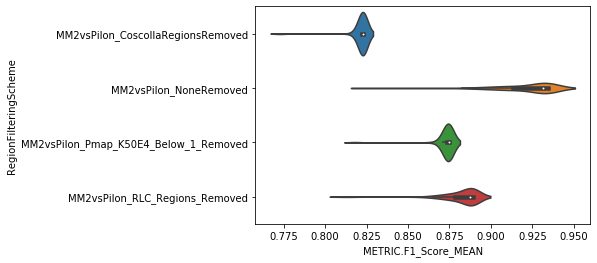

In [54]:
sns.violinplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_SNPs)

# Plotting Precision-Recall curves for SNV calling

In [55]:
HapPy_PR_DF_SNPs_QQ_0to60.head(3)

,QQ,RegionFilteringScheme,variantType,METRIC.Recall_MEAN,METRIC.Precision_MEAN,METRIC.Frac_NA_MEAN,METRIC.F1_Score_MEAN,TRUTH.TP_MEAN,TRUTH.FN_MEAN,QUERY.TP_MEAN,QUERY.FP_MEAN,QUERY.UNK_MEAN,METRIC.Recall_SEM,METRIC.Precision_SEM,METRIC.Frac_NA_SEM,METRIC.F1_Score_SEM,TRUTH.TP_SEM,TRUTH.FN_SEM,QUERY.TP_SEM,QUERY.FP_SEM,QUERY.UNK_SEM
1,0,MM2vsPilon_CoscollaRegionsRemoved,SNPs,0.703950,0.992766,0.002119,0.823115,1067.611111,424.305556,1067.611111,7.055556,2.611111,0.006861,0.000878,0.000649,0.004729,76.325767,19.600973,76.325767,0.690002,0.774881
3,0,MM2vsPilon_NoneRemoved,SNPs,0.889595,0.985446,0.009076,0.934579,1334.611111,157.305556,1329.694444,19.333333,13.916667,0.006137,0.001363,0.001794,0.003155,88.316713,10.774884,88.351201,1.873796,2.850056
5,0,MM2vsPilon_Pmap_K50E4_Below_1_Removed,SNPs,0.779845,0.997367,0.004658,0.874814,1175.305556,316.611111,1175.194444,3.055556,6.194444,0.006129,0.000463,0.000981,0.003871,80.429530,15.995102,80.424803,0.535923,1.321266


### Plot Precision-Recall curve for data points with MQ threshold 0 to 60

mkdir: cannot create directory ‘./Illumina_VariantCalling_Eval_Plots/’: File exists


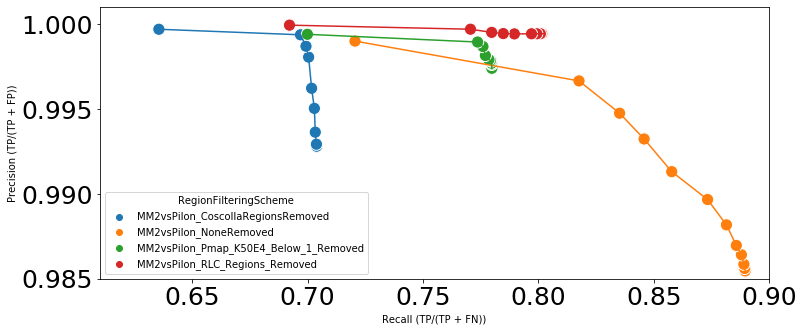

In [56]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_0to60  

### Precision Recall
sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=150)

#axes.set_title("Precision-Recall Curve: Comparing different")
#axes.set_xlabel("TPR (TP/(TP + FN))")
#axes.set_ylabel("PPV (TP/(TP + FP))")
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)


#plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ_0to60_V2.WiRLCmasking.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ_0to60_V2.WiRLCmasking.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

In [57]:
STOP!!!

SyntaxError: invalid syntax (<ipython-input-57-269510821509>, line 1)

In [ ]:
HapPy_PR_DF_SNPs_QQ_0to60.head()

In [ ]:
listOf_FilteringSchemes = ["MM2vsPilon_NoneRemoved",
                           "MM2vsPilon_CoscollaRegionsRemoved", 
                           "MM2vsPilon_Pmap_K50E4_Below_1_Removed", ]


dictOf_FilterSchemeToColor = {"MM2vsPilon_NoneRemoved" : "orange",
                              "MM2vsPilon_CoscollaRegionsRemoved" : "blue", 
                               "MM2vsPilon_Pmap_K50E4_Below_1_Removed" : "green"  }


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.995, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()



In [ ]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

In [ ]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 45 )]

In [ ]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 60 )]

In [ ]:
HapPy_PR_DF_SNPs_QQ_30

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_SNPs_QQ_30, ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()



In [ ]:
HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )]

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)




#sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
#                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )], ax=axes, marker="+", legend=False, s=200, linewidth=0)


sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

plt.show()



In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)




sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 40 )], ax=axes, marker="o", legend=False, s=200, linewidth=0)


#sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
#                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )], ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


plt.title('SNS Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.983, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_WithY_PrecisionSEM_Shaded_WithX_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_WithY_PrecisionSEM_Shaded_WithX_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


#plt.errorbar(x = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_MEAN"] , y = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_MEAN"] , y = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = HapPy_PR_DF_SNPs_QQ_0to60["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


plt.show()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs

### Precision Recall


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_40CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

### Plotting F1-score distributions for SNV calling (MQ 1 to 60)

In [ ]:
sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_SNPs)

plt.show()

## Plotly Interactive Plot of Precision-Recall SNV Curve

In [ ]:
#input_DF = HapPy_PR_DF_SNPs_QQ_0to60  

#fig = px.scatter(input_DF, x = "METRIC.Recall_MEAN", y = "METRIC.Precision_MEAN", hover_data=["QQ", "METRIC.F1_Score_MEAN", "QUERY.TP_MEAN", "QUERY.FP_MEAN", "TRUTH.FN_MEAN"],
#                 color = "RegionFilteringScheme", range_y=(0.98, 1))

#fig.show()

In [ ]:
HapPy_PR_DF_SNPs_QQ_30 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [30] )]   

In [ ]:
HapPy_PR_DF_SNPs_QQ_30.shape

In [ ]:
HapPy_PR_DF_SNPs_QQ_30

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_30  

### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ30_only_V2.png"       
plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_30  

### Precision Recall

#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ30_only_V2_WITHOUTERRORBARS.png"       
plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [ ]:
HapPy_PR_DF_SNPs_QQ_30

In [ ]:
HapPy_PR_DF_SNPs_QQ_50 = HapPy_PR_DF_SNPs[ HapPy_PR_DF_SNPs["QQ"].isin(  [55] )]   

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_50  


### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=True)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/
Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ50_only_V2.png"       
#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [ ]:
HapPy_PR_DF_SNPs_QQ_50.head(3)

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_SNPs_QQ_50  


### Precision Recall

#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 2)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 2)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=True)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend=False, s=50)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.985, 1.001)
axes.set_xlim(0.61, 0.9)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/
Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_SNVsOnly_PrecisionRecall_Plots_MaskingApproaches_MQ50_only_V2_WITHOUT_ERRORBARS.png"       
#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.show()

In [ ]:
#HapPy_Mean_PR_DF_SNPs.sort_values(by=['METRIC.F1_Score'], ascending = False)

## Interactive Precision-Recall Plot - SNV Precision-Recall Curve

In [ ]:
HapPy_PR_DF_SNPs_QQ_0to60.head(6)

In [ ]:
input_DF = HapPy_PR_DF_SNPs_QQ_0to60 

#fig = px.scatter(input_DF,
#                 x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",
#                 hover_data = ["QQ", "RegionFilteringScheme", "variantType", "METRIC.Recall_SEM",
#                               "METRIC.Precision_SEM", "METRIC.F1_Score_MEAN", "TRUTH.TP_MEAN", "TRUTH.FN_MEAN",
#                               "QUERY.TP_MEAN", "QUERY.FP_MEAN"],
#                 color = "RegionFilteringScheme", range_y=(0.985, 1.001), range_x=(0.61, 0.9))

#fig.show()

# Evaluating INDEL calling

## Parsing the highest F1-score for each masking approach (INDELs)

In [ ]:
HapPy_PR_DF_INDELs.describe()

#### Highest F1-score across all approaches: 

In [ ]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN", ascending=False).head(1)

#### Highest F1-score across "removing PLC regions": 

In [ ]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_CoscollaRegionsRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

#### Highest F1-score across "removing non-unique regions" (defined by P-map-K50-E4)": 

In [ ]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_Pmap_K50E4_Below_1_Removed"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)    

#### Highest F1-score across "removing no regions": 

In [ ]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

In [ ]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

In [ ]:
HapPy_PR_DF_INDELs[ HapPy_PR_DF_INDELs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"  ].sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)     

### Make a histogram or violin plot comparing the F1-scores of different masking approaches

In [ ]:
HapPy_PR_DF_INDELs.head(1)

In [ ]:
sns.violinplot(y="RegionFilteringScheme", x="METRIC.F1_Score_MEAN", data=HapPy_PR_DF_INDELs)

# Plotting Precision-Recall curves for INDEL calling

In [ ]:
HapPy_PR_DF_INDELs_QQ_0to60.head(3)

In [ ]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 0 )]

In [ ]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 55 )]

In [ ]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 60 )]

In [ ]:
HapPy_PR_DF_INDELs.describe()

In [ ]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.Precision_MEAN" , ascending=False).head(1)

In [ ]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

### Plot Precision-Recall curve for data points with MQ threshold 0 to 60

In [ ]:
listOf_FilteringSchemes = ["MM2vsPilon_NoneRemoved",
                           "MM2vsPilon_CoscollaRegionsRemoved", 
                           "MM2vsPilon_Pmap_K50E4_Below_1_Removed", ]


dictOf_FilterSchemeToColor = {"MM2vsPilon_NoneRemoved" : "orange",
                              "MM2vsPilon_CoscollaRegionsRemoved" : "blue", 
                               "MM2vsPilon_Pmap_K50E4_Below_1_Removed" : "green"  }


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)



sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
                data = HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 40 )], ax=axes, marker="o", legend=False, s=200, linewidth=0)


#sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", color = "red", #style = "variantType",
#                data = HapPy_PR_DF_SNPs[ (HapPy_PR_DF_SNPs["QQ"] == 30 )], ax=axes, marker="*", legend=False, s=200, linewidth=0)



for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    #plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


plt.title('INDEL (1-15 bp) Variant Calling Performance')
    
axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_36CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WiMQ40RedDot.pdf"       

plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()



In [ ]:
HapPy_PR_DF_INDELs[ (HapPy_PR_DF_INDELs["QQ"] == 40)] 

Mask PLC regions.        F1 score = 0.75. Precison = 99.1%.   Recall = 61.6%

Mask non-unique regions. F1 score = 0.83. Precision = 98.2%   Recall = 72.1%

No masking of regions    F1 score = 0.88  Precision = 98.8%   Recall = 80.9%


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


plt.show()


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs  

### Precision Recall

plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


#plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
#            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25, linewidth=0)

for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    #plt.fill_between(x_i, 
    #                 y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
    #                 y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)

    plt.fill_betweenx(y_i, x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.2, color = i_color)


axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])


!mkdir ./Illumina_VariantCalling_Eval_Plots/

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded_Precision_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_RecallSEM_Shaded_Precision_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))

input_DF = HapPy_PR_DF_INDELs

### Precision Recall


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            yerr = input_DF["METRIC.Precision_SEM"], color="black", alpha = 1, capsize= 0)


plt.errorbar(x = input_DF["METRIC.Recall_MEAN"] , y = input_DF["METRIC.Precision_MEAN"], markersize = 0, elinewidth=1, ls='none',
            xerr = input_DF["METRIC.Recall_SEM"], color="black", alpha = 1, capsize= 0)


sns.lineplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN", hue = "RegionFilteringScheme", #style = "variantType",
             data = input_DF, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall_MEAN", y="METRIC.Precision_MEAN",  hue = "RegionFilteringScheme", #style = "variantType",
                data = input_DF, ax=axes, legend="full", s=25)


for i_scheme in listOf_FilteringSchemes:
    
    input_DF_schemeSubset = input_DF[ input_DF["RegionFilteringScheme"] == i_scheme ]
    
    i_color = dictOf_FilterSchemeToColor[i_scheme]
    
    y_i = input_DF_schemeSubset["METRIC.Precision_MEAN"]
    x_i = input_DF_schemeSubset["METRIC.Recall_MEAN"]

    plt.fill_between(x_i, 
                     y_i - input_DF_schemeSubset["METRIC.Precision_SEM"], 
                     y_i + input_DF_schemeSubset["METRIC.Precision_SEM"], alpha=0.4, color = i_color)


    #plt.fill_betweenx(y_i, 
    #                 x_i - input_DF_schemeSubset["METRIC.Recall_SEM"], 
    #                 x_i + input_DF_schemeSubset["METRIC.Recall_SEM"], alpha=0.4,  color = i_color)



axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
axes.set_ylim(0.955, 1.001)
axes.set_xlim(0.45, 0.84)

axes.tick_params(labelsize= 25)

plt.legend(title='Region Filtering Scheme ', loc='lower left', labels=['Remove PLC Regions', "No regions removed", 'Remove regions with non-perfect Pileup Mappability (K=50 bp)', ])

Output_PNG_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.png"       
Output_PDF_PATH = "./Illumina_VariantCalling_Eval_Plots/VC_Eval_28CI_INDELsOnly_PrecisionRecall_Plots_MaskingApproaches_All60Points_MQ_PrecisionSEM_Shaded_WithXandY_SEM_ErrorBars.pdf"       

#plt.savefig(Output_PNG_PATH, bbox_inches='tight', dpi=125)
#plt.savefig(Output_PDF_PATH, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
HapPy_PR_DF_INDELs["RegionFilteringScheme"].value_counts()

In [ ]:
HapPy_PR_DF_INDELs.sort_values( "METRIC.F1_Score_MEAN" , ascending=False).head(1)

# Let's look at SNV Precision-Recall of all 31 samples together (With Standard Masking Filter)

In [ ]:
HapPy_PR_DF_Indiv_SNPs = HapPy_PR_DF_IndividualCurves[HapPy_PR_DF_IndividualCurves["variantType"] == "SNPs"]
HapPy_PR_DF_Indiv_SNPs_NoMasking = HapPy_PR_DF_Indiv_SNPs[HapPy_PR_DF_Indiv_SNPs["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved"] 

HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60 = HapPy_PR_DF_Indiv_SNPs_NoMasking[ HapPy_PR_DF_Indiv_SNPs_NoMasking["QQ"].isin([1] + list(np.arange(5, 65, 5)) )]   



In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,10))

### Precision Recall
sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "SampleID", 
             data = HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60, ax=axes, legend=False)

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "SampleID", 
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_QQ_0to60,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
#axes.set_ylim(0.985, 1.001)
#axes.set_xlim(0.61, 0.9)

plt.show()

# Plot Precision-Recall for all samples (31 points) after using MQ >= 30 and Standard Masking Filter

In [ ]:
HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30 = HapPy_PR_DF_Indiv_SNPs_NoMasking[ HapPy_PR_DF_Indiv_SNPs_NoMasking["QQ"] == 30]

In [ ]:
HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno = pd.merge(HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30, PMP_36CI_AnalysisSet_AssemblySummary,  
                                               how='left', left_on=['SampleID', ], right_on = ['SampleID', ])         


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(6,6))

### Precision Recall

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "RegionFilteringScheme", palette = ["orange"],
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
axes.set_ylim(0.95,1.04)
axes.set_xlim(0.75,0.95)

plt.show()


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(6,6))

### Precision Recall

sns.scatterplot(x="METRIC.Recall", y="METRIC.Precision",  hue = "PrimaryLineage_PB", 
                data = HapPy_PR_DF_Indiv_SNPs_NoMasking_MQ30_Anno,
                ax=axes, )#s=100)

#axes.set_title("Precision-Recall Curve: Comparing different")
axes.set_xlabel("TPR (TP/(TP + FN))")
axes.set_ylabel("PPV (TP/(TP + FP))")
#axes.set_ylim(0.95,1.04)
#axes.set_xlim(0.75,0.95)

plt.show()


## let's look into lineage specific P-R values

In [ ]:
Pilon_Eval_DF_Indiv_SNPs_Anno = pd.merge(PMP_36CI_AnalysisSet_AssemblySummary, HapPy_PR_DF_Indiv_SNPs, 
                                               how='left', left_on=['SampleID', ], right_on = ['SampleID', ])

In [ ]:
Pilon_Eval_DF_Indiv_SNPs_Anno.shape

In [ ]:
Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask = Pilon_Eval_DF_Indiv_SNPs_Anno[ (Pilon_Eval_DF_Indiv_SNPs_Anno["RegionFilteringScheme"] == "MM2vsPilon_NoneRemoved") ]        

In [ ]:
Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask.head(3)

In [ ]:
# https://stackoverflow.com/questions/19202093/how-to-select-columns-from-groupby-object-in-pandas
HapPy_Mean_ByLin_PR_DF = Pilon_Eval_DF_Indiv_SNPs_Anno_NoMask.groupby(["QQ", "RegionFilteringScheme", "variantType", "PrimaryLineage_PB"]).mean().reset_index()


In [ ]:
HapPy_Mean_ByLin_PR_DF.head(2)

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12,5))
input_DF = HapPy_Mean_ByLin_PR_DF  

### Precision Recall
sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "PrimaryLineage_PB", #style = "PrimaryLineage_PB",
             data = input_DF, ax=axes, legend="full")

axes.set_xlabel("Recall (TP/(TP + FN))")
axes.set_ylabel("Precision (TP/(TP + FP))")
#axes.set_ylim(0.9,1.04)
#axes.set_xlim(0.72,1.04)

axes.tick_params(labelsize= 25)
plt.show()

In [ ]:
HapPy_PR_DF_SNPs.head()

### Let's look at a P-R Curve for each sample (28 isolates)

In [ ]:
HapPy_PR_DF_Indiv_SNPs.head(3)

In [ ]:
HapPy_PR_DF_Indiv_SNPs["Type"].value_counts()

In [ ]:




SampleOfInterest = ["M0011368_9"] #, "M0015765_2", "M0003941_3", "DNA017", "DNA097", "02_R1675", "M0017522_5", "02_R1708",]

In [ ]:
i = 1

for SampleID in (SampleOfInterest):
    
    print(i, SampleID)
    i += 1
    f, axes = plt.subplots(1, 1, figsize=(12,5))

    
    
    input_DF = HapPy_PR_DF_Indiv_SNPs[(HapPy_PR_DF_Indiv_SNPs["SampleID"] == SampleID)] #[HapPy_Mean_PR_DF_SNPs["QQ"] <= 255]  # HapPy_Mean_PR_DF_SNPs_QQ_0to55 #HapPy_Mean_PR_DF_mpileup

    sample_Lineage = ID_To_Lineage_Dict[SampleID]

    ### Precision Recall
    sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "RegionFilteringScheme", #style = "variantType",
                 data = input_DF, ax=axes, legend="full")
    
    axes.set_title(f"Precision-Recall-Comparing Region Filtering Schemes - SampleID = {SampleID} - {sample_Lineage}")
    axes.set_xlabel("Recall (TP/(TP + FN))")
    axes.set_ylabel("Precision (TP/(TP + FP))")
    #axes.set_ylim(0.72,1.04)
    #axes.set_xlim(0.72,1.04)
    axes.tick_params(labelsize= 25)

    plt.show()
    
    sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score", data=input_DF)
    plt.show()    
    

In [ ]:
i = 1

for SampleID in (SampleIDs_36CI_SOI):
    
    print(i, SampleID)
    i += 1
    f, axes = plt.subplots(1, 1, figsize=(12,5))

    
    
    input_DF = HapPy_PR_DF_Indiv_SNPs[(HapPy_PR_DF_Indiv_SNPs["SampleID"] == SampleID)] #[HapPy_Mean_PR_DF_SNPs["QQ"] <= 255]  # HapPy_Mean_PR_DF_SNPs_QQ_0to55 #HapPy_Mean_PR_DF_mpileup

    sample_Lineage = ID_To_Lineage_Dict[SampleID]

    ### Precision Recall
    sns.lineplot(x="METRIC.Recall", y="METRIC.Precision", hue = "RegionFilteringScheme", #style = "variantType",
                 data = input_DF, ax=axes, legend="full")
    
    axes.set_title(f"Precision-Recall-Comparing Region Filtering Schemes - SampleID = {SampleID} - {sample_Lineage}")
    axes.set_xlabel("Recall (TP/(TP + FN))")
    axes.set_ylabel("Precision (TP/(TP + FP))")
    #axes.set_ylim(0.72,1.04)
    #axes.set_xlim(0.72,1.04)
    axes.tick_params(labelsize= 25)

    plt.show()
    
    sns.boxplot(y="RegionFilteringScheme", x="METRIC.F1_Score", data=input_DF)
    plt.show()    
    